## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2023)

Pekka Marttinen, Vishnu Raj, Antti Pöllänen, Nikitin Alexander, Sebastiaan De Peuter, Tommi Gröhn, Julien Martinelli, Ali Khoshvishkaie, Onur Poyraz

## Exercise 8, due on Tuesday March 28 at 23:50.

### Contents
1. Problem 1: Minimize KL divergence using PyTorch
2. Problem 2: VB for a factor analysis model (1/2)
3. Problem 3: VB for a factor analysis model (2/2)

# Problem 1: Minimize KL divergence using PyTorch
PyTorch is a powerful auto-differentiation framework that allows us to do any optimization, as long as we can define the objective function and corresponding optimization variables. It has been widely used for Bayesian deep learning. In this exercise, we will study how to use PyTorch to fit a Gaussian distribution to a known Mixture of Gaussian by minimizing their KL divergence, and compare the difference between the forward and reverse form of the KL.

Recall that the KL divergence between two distributions $q(x)$ and $p(x)$ is defined as:

$$\text{KL}[q(x)|p(x)]=\int q(x)\log\frac{q(x)}{p(x)}dx.$$

This is typically called the **Reverse KL** which we have used before in the course (like in Variational Bayes). If the probability density functions of $q(x)$ and $p(x)$ are known, and we can get samples from $q(x)$, an unbiased estimator of KL divergence is:
$$\text{KL}[q(x)|p(x)]\approx\log\frac{q(x_i)}{p(x_i)}=\log q(x_i)-\log p(x_i),$$
where $x_i\sim q(x)$. We will use above estimator for this exercise.

There is also a **Forward KL**: $\text{KL}[p(x)|q(x)]$ defined as:

$$\text{KL}[p(x)|q(x)]=\int p(x)\log\frac{p(x)}{q(x)}dx,$$

which is used in other inference algorithms such as Expectration Propogation which is not within the scope of this course.

Let $p(x \mid \pi) = \pi \mathcal{N}(0,1)+(1-\pi)\mathcal{N}(8,1)$ where $\pi\sim\text{Bernoulli}(0.4)$ be the true mixture distribution which we want to fit using a Gaussian $q(x; \mu, \sigma)$. We want to estimate $\mu$ and $\sigma$ using both the forwared and reverse KL.

Complete the template below with the relevant code.  

Optimizing reverse KL
EPOCH 1: KL: 2.4601.
EPOCH 101: KL: 1.7567.
EPOCH 201: KL: 1.8303.
EPOCH 301: KL: 1.9324.
EPOCH 401: KL: 1.8084.
EPOCH 501: KL: 1.7001.
EPOCH 601: KL: 1.8429.
EPOCH 701: KL: 1.8736.
EPOCH 801: KL: 1.8233.
EPOCH 901: KL: 0.5412.
Optimizing forward KL
EPOCH 1: KL: 0.7209.
EPOCH 101: KL: 0.7063.
EPOCH 201: KL: 0.7352.
EPOCH 301: KL: 0.7476.
EPOCH 401: KL: 0.7306.
EPOCH 501: KL: 0.7090.
EPOCH 601: KL: 0.7323.
EPOCH 701: KL: 0.7094.
EPOCH 801: KL: 0.7336.
EPOCH 901: KL: 0.7019.


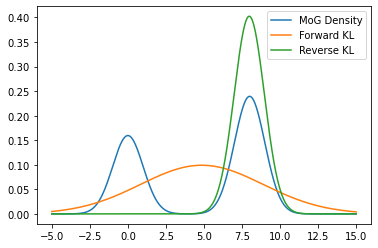

In [4]:
import numpy as np
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as Dis
import matplotlib
import matplotlib.pyplot as plt

class Gaussian:
    """
    This represents q(x) 
    Gaussian distribution is parametrized by mean (mu) and standard deviation. The standard deviation is 
    parametrized as sigma = log(1 + exp(rho)) to make it positive all the time. A sample from the distribution
    can be obtained by first sampling from a unit Gaussian, shifting the samples by the mean and scaling by the 
    standard deviation: w = mu + log(1 + exp(rho)) * epsilon
    """
    def __init__(self, mu, rho):
        self.mean = mu
        self.rho = rho

    @property
    def std_dev(self):
        return torch.log1p(torch.exp(self.rho))

    def sample(self, num_samples = 1):
        # Sample num_samples data points from Gaussian distribution
        # Return a tensor contains all the samples 
        
        # Sample num_samples datapoints from N(0,1) 
        epsilon = Dis.Normal(0,1).sample([num_samples])
        
        # Scale and shift epsilon
        samples = self.mean + self.std_dev * epsilon # EXERCISE
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        return samples
    
    def logprob(self, samples):
        # Compute the log probability of each sample under Gaussian distribution
        # Return a tensor containing the log probability of all samples        
        
        logp = -np.log(np.sqrt(2*np.pi)) - torch.log(self.std_dev) - ((samples - self.mean) ** 2)/(2 * self.std_dev ** 2) # EXERCISE
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        return logp
    
class MoG:
    """
    This represents p(x).
    In this example, mixture of two Gaussian distribution is constructed by 2 Gaussian distributions 
    N(0,2) and N(8,1), and each datapoint is from N(0,2) with probability p = 0.4 and from N(8,1) with 
    probability 0.6.
    """
    def __init__(self, mu_1=0., sigma_1=1., mu_2=8., sigma_2=1., prob = 0.4):
        self.mean_1 = torch.tensor(mu_1)
        self.sigma_1 = torch.tensor(sigma_1)
        self.mean_2 = torch.tensor(mu_2)
        self.sigma_2 = torch.tensor(sigma_2)
        self.prob = torch.tensor(prob)

    def sample(self, num_samples = 1):
        # Sample num_samples data points from MoG distribution
        # Return a tensor contains all the samples
        
        # sample from N(0, 2)
        # sample form N(8, 1)
        # sample from Bern(0.4)
        # Combine the three to from a sample form mixture
        # sample_gaussian_1 = ? # EXERCISE
        # sample_gaussian_2 = ? # EXERCISE
        # sample_bernoulli = ? # EXERCISE
        # samples  = ? # EXERCISE
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        sample_gaussian_1 = Dis.Normal(self.mean_1, self.sigma_1).sample([num_samples]) 
        sample_gaussian_2 = Dis.Normal(self.mean_2, self.sigma_2).sample([num_samples])
        sample_bernoulli = Dis.Bernoulli(probs = self.prob).sample([num_samples]) 
        samples = sample_bernoulli * sample_gaussian_1 + (1. - sample_bernoulli) * sample_gaussian_2
        return samples
    
    def logprob(self, samples):
        
        # Compute the log probability of each sample under the MoG distribution
        # Return a tensor containing the log probability of all samples
        
        # logp = ? # EXERCISE
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        prob_1 = torch.exp(-np.log(np.sqrt(2 * np.pi)) - torch.log(self.sigma_1) - ((samples - self.mean_1) ** 2) / (2 * self.sigma_1 ** 2)) * self.prob 
        prob_2 = torch.exp(-np.log(np.sqrt(2 * np.pi)) - torch.log(self.sigma_2) - ((samples - self.mean_2) ** 2) / (2 * self.sigma_2 ** 2)) * (1 - self.prob) 
        logp = torch.log(prob_1 + prob_2) 

        return logp    

class KL_divergence(nn.Module):
    def __init__(self):
        super(KL_divergence, self).__init__()
        # define the mean and standard deviation as parameters, and initialization
        self.mu = nn.Parameter(torch.Tensor(1).uniform_(-2., 12.))
        self.rho = nn.Parameter(torch.Tensor(1).uniform_(1.0, 5.0))
        
        self.gaussian = Gaussian(self.mu, self.rho)
        self.mog = MoG()
    
    def compute_forwardKL(self):
        num_samples = torch.tensor(1000)
        
        # compute the forward KL divergence between p and q of num_samples data points
        # Return the estimated forward KL divergence
        
        
        # sample form MoG
        # compute forware KL 
        
        samples = self.mog.sample(num_samples) # EXERCISE
        fkl = (self.mog.logprob(samples).sum() - self.gaussian.logprob(samples).sum())/num_samples # EXERCISE
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        return fkl
    
    def compute_reverseKL(self):
        num_samples = torch.tensor(1000)
        # compute the reverse KL divergence between p and q with num_samples data points
        # Return the estimated reverse KL divergence
        
        # sample form Gaussian
        # compute reverse KL 
        
        # samples = ? # EXERCISE
        # rkl = ? # EXERCISE
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        samples = self.gaussian.sample(num_samples) # EXERCISE
        rkl = (self.gaussian.logprob(samples).sum() - self.mog.logprob(samples).sum())/num_samples # EXERCISE
        
        return rkl

# Optimize the KL by using gradient descent
def optimization(kl, forward = False, learning_rate = 0.1, num_epoch = 1000):
    parameters = set(kl.parameters())
    optimizer = optim.Adam(parameters, lr = learning_rate, eps=1e-3)
    
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        if forward:
            loss = kl.compute_forwardKL()
        else:
            loss = kl.compute_reverseKL()
            
        loss.backward()
        optimizer.step()
        
        if (epoch % 100) == 0:
            print('EPOCH %d: KL: %.4f.'% (epoch+1, loss))

print('Optimizing reverse KL')
torch.manual_seed(0)
kl_reverse = KL_divergence()
optimization(kl_reverse, forward = False)
Gaussian_reverse= kl_reverse.gaussian

print('Optimizing forward KL')
kl_forward = KL_divergence()
optimization(kl_forward, forward= True)
Gaussian_forward = kl_forward.gaussian

# Plot the pdf of Gaussian fitted from forward KL and reverse KL, and also the ground truth pdf from MoG
x_plot = torch.linspace(-5., 15., 1000)
density_mog = torch.exp(kl_forward.mog.logprob(x_plot)).detach().numpy()
density_Gaussian_forward = torch.exp(Gaussian_forward.logprob(x_plot)).detach().numpy()
density_Gaussian_reverse = torch.exp(Gaussian_reverse.logprob(x_plot)).detach().numpy()

fig, ax = plt.subplots()
ax.plot(x_plot, density_mog)
ax.plot(x_plot, density_Gaussian_forward)
ax.plot(x_plot, density_Gaussian_reverse)

ax.legend(('MoG Density','Forward KL', 'Reverse KL'))

# Problem 2: VB for a factor analysis model (1/2)

The data set consists of $D$-dimensional vectors $\mathbf{x}_{n}\in \mathbb{R}^{D},$ for $n=1,\ldots,N$. We model the data using factor analysis with $K$-dimensional factors $\mathbf{z}_{n}\in\mathbb{R}^{K}$. In detail, the
model is specified as follows:
\begin{align*}
\mathbf{x}_{n} &  \sim\mathcal{N}_{D}(\mathbf{Wz}_{n},\text{diag}
(\mathbf{\psi})^{-1}),\quad n=1,\ldots,N,\\
\psi_{d} &  \sim\text{Gamma}(a,b),\quad d=1,\ldots,D,\\
\mathbf{w}_{d} &  \sim\mathcal{N}_{K}(\mathbf{0,}\alpha\mathbf{I}),\quad
d=1,\ldots,D,\\
\mathbf{z}_{n} &  \sim\mathcal{N}_{K}(\mathbf{0,I}),\quad n=1,\ldots,N.
\end{align*}
Here, $\mathbf{W}$ is a $D\times K$ factor loading matrix and $\mathbf{w}_{d}$ is the $d$th row of $\mathbf{W}$ written as a column vector. Parameter $\psi_{d}^{-1}$ is the variance for the $d$th dimension in the observed data
and diag$(\psi)$ denotes a diagonal matrix with elements $\mathbf{\psi} =(\psi_{1},\ldots,\psi_{D})^{T}$ on the diagonal.

We approximate the posterior $p(\mathbf{\psi},\mathbf{Z},\mathbf{W} |\mathbf{X})$ using the mean-field approximation: 

$$ 
q(\Theta)=\prod_{d=1}^{D}q(\mathbf{w}_{d})\prod_{n=1}^{N}q(\mathbf{z}_{n})\prod_{d=1}^{D}q(\psi_{d}).
$$


__1__ Write the logarithm of the joint distribution, $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X})$.

__2__ Remove from the logarithm of the joint distribution all terms that do not depend on $\mathbf{z}_{n}$.

__3__ Show that the updated factor $q(\mathbf{z}_{n})$ is equal to

$$
q(\mathbf{z}_{n})=\mathcal{N}_{K}(\mathbf{\mu}_{n},\mathbf{K}_{n}),
$$

where

\begin{align*}
\mathbf{K}_{n} &  =\left[  I+\sum_{d=1}^{D}\left\langle \psi_{d}\right\rangle
\left\langle \mathbf{w}_{d}\mathbf{w}_{d}^{T}\right\rangle \right]  ^{-1}
\quad\text{and}\\
\mathbf{\mu}_{n} &  =\mathbf{K}_{n}\left\langle \mathbf{W}^{T}\right\rangle
\text{diag}(\left\langle \mathbf{\psi}\right\rangle )\mathbf{x}_{n}.
\end{align*}

Here $\left\langle \mathbf{\cdot}\right\rangle $ is used as a shorthand for the expectation of a variable with respect to its factor, e.g., $\left\langle \mathbf{\psi}\right\rangle =\mathbb{E}_{q(\mathbf{\psi})}[\mathbf{\psi}]$ etc.

__Hint 1:__ Try to write the log joint as 

$$
-\frac{1}{2}\mathbf{z}_{n}^{T}\mathbf{Az}_{n}+\mathbf{b}^{T}\mathbf{z}_{n}
$$

for some $\mathbf{A}$ and $\mathbf{b}$, after which you can apply the 'completing the square' technique.

__Hint 2:__ Suppose $\mathbf{A}$ is an $N\times M$ matrix. Further suppose that $\mathbf{D}$ is an $N\times N$ diagonal matrix, $\mathbf{D} =$diag$(d_{1},\ldots,d_{N})$. Then $\mathbf{A}^{T}\mathbf{DA}$ can be written
as

$$
\mathbf{A}^{T}\mathbf{DA=}\sum_{n=1}^{N}d_{n}\mathbf{a}_{n}\mathbf{a}_{n}^{T},
$$

where $\mathbf{a}_{n}$ is the $n$th row of $\mathbf{A}$ written as a column vector.

__Hint 3:__ Recall that expectation is a linear operator, i.e. $\mathbb{E}(aX+bY)=a\mathbb{E}(X)+b\mathbb{E}(Y)$. Further, if some random variables $A$ and $B$ are independent, then $\mathbb{E}_{q(A)q(B)} (AB)=\mathbb{E}_{q(A)}(A)\mathbb{E}_{q(B)}(B)$.


Write your answer to Problem 2 here.

__1__ Write the logarithm of the joint distribution, $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X})$.

The joint distribution can be written as:

$\log p(\mathbf{X},\mathbf{W},\mathbf{Z},\psi) = \log \left(
p(\mathbf{X}|\mathbf{W},\mathbf{Z},\psi)p(\mathbf{W})p(\mathbf{Z})p(\mathbf{\psi})
\right)
$

We can simply plug in the priors provided above:

=> $\log p(\mathbf{X},\mathbf{W},\mathbf{Z},\psi) = 
\log \left(
\mathcal{N}(\mathbf{X}|\mathbf{Wz},\text{diag}(\mathbf{\psi})^{-1})
\mathcal{N}(\mathbf{W}|\mathbf{0,}\alpha\mathbf{I})
\mathcal{N}(\mathbf{Z}|\mathbf{0,I})
\text{Gamma}(\psi|a,b)
\right)
$


$=> \log p(\mathbf{X},\mathbf{W},\mathbf{Z},\psi) = \log \left(
\prod^N_{n=1} \mathcal{N}_D\left(\mathbf{x}_n|\mathbf{Wz}_{n}, \text{diag}(\psi)^{-1}\right)
\prod^D_{d=1} \prod^K_{k=1} \mathcal{N}(\mathbf{w}_{dk}|0, \alpha) 
\prod^N_{n=1} \prod^K_{k=1} \mathcal{N}(\mathbf{z}_{nk}|0, 1) 
\prod^D_{d=1} \text{Gamma}(\psi_d|a,b) 
\right) \text{(answer)} $ 

__2__ Remove from the logarithm of the joint distribution all terms that do not depend on $\mathbf{z}_{n}$.

The joint distribution after removing all terms that do not depend on $\mathbf{z}_n$:

$\log p(\mathbf{X},\mathbf{W},\mathbf{Z},\psi) = \log \left(
\prod^N_{n=1} \mathcal{N}_D\left(\mathbf{x}_n|\mathbf{Wz}_{n}, \text{diag}(\psi)^{-1}\right)
\prod^N_{n=1} \prod^K_{k=1} \mathcal{N}(\mathbf{z}_{nk}|0, 1)
\right) + C $

=> $\log p(\mathbf{X},\mathbf{W},\mathbf{Z},\psi) = \log \left(
\prod^N_{n=1} \mathcal{N}_D\left(\mathbf{x}_n|\mathbf{Wz}_{n}, \text{diag}(\psi)^{-1}\right) \right)
+ \log \left(
\prod^N_{n=1} \prod^K_{k=1} \mathcal{N}(\mathbf{z}_{nk}|0, 1)
\right) + C$

=> $\log p(\mathbf{X},\mathbf{W},\mathbf{Z},\psi) = \log \left(
\prod^N_{n=1} \mathcal{N}_D\left(\mathbf{x}_n|\mathbf{Wz}_{n}, \text{diag}(\psi)^{-1}\right) \right)
+ \log \left(
\prod^N_{n=1} \mathcal{N}_K(\mathbf{z}_{n}|0, I)
\right) + C \text{(answer)} $

__3__ Show that the updated factor $q(\mathbf{z}_{n})$ is equal to

$$
q(\mathbf{z}_{n})=\mathcal{N}_{K}(\mathbf{\mu}_{n},\mathbf{K}_{n}),
$$

where

\begin{align*}
\mathbf{K}_{n} &  =\left[  I+\sum_{d=1}^{D}\left\langle \psi_{d}\right\rangle
\left\langle \mathbf{w}_{d}\mathbf{w}_{d}^{T}\right\rangle \right]  ^{-1}
\quad\text{and}\\
\mathbf{\mu}_{n} &  =\mathbf{K}_{n}\left\langle \mathbf{W}^{T}\right\rangle
\text{diag}(\left\langle \mathbf{\psi}\right\rangle )\mathbf{x}_{n}.
\end{align*}

Here $\left\langle \mathbf{\cdot}\right\rangle $ is used as a shorthand for the expectation of a variable with respect to its factor, e.g., $\left\langle \mathbf{\psi}\right\rangle =\mathbb{E}_{q(\mathbf{\psi})}[\mathbf{\psi}]$ etc.

The joint distribution from previous part with only terms dependent on $\mathbf{z}_n$

$\log p(\mathbf{X},\mathbf{W},\mathbf{Z},\psi) = \log \left(
\prod^N_{n=1} \mathcal{N}_D\left(\mathbf{x}_n|\mathbf{Wz}_{n}, \text{diag}(\psi)^{-1}\right) \right)
+ \log \left(
\prod^N_{n=1} \mathcal{N}_K(\mathbf{z}_{n}|0, I)
\right) $

We can omit the product of all datapoints because this is only one update for a new datapoint. The updated factor $q(\mathbf{z}_{n})$ is written as

$\log q(\mathbf{z}_{n}) = 
\log \mathcal{N}_D\left(\mathbf{x}_n|\mathbf{Wz}_{n}, \text{diag}(\psi)^{-1}\right) + \log \mathcal{N}_K (\mathbf{z}_n | 0,I) $

$\log q(\mathbf{z}_{n}) = 
\log \left[ \dfrac{1}{\sqrt{(2\pi)^D \text{diag}(\psi)^{-1}}} \exp\left(-\dfrac{1}{2} (\mathbf{x}_n - \mathbf{W} \mathbf{z}_n)^T \text{diag}(\psi)(\mathbf{x}_n - \mathbf{W} \mathbf{z}_n)\right) \right] + \log \left[ \dfrac{1}{\sqrt{(2\pi)^K}} \exp \left(-\dfrac{1}{2} \mathbf{z}_n^T\mathbf{z}_n \right) \right] $

Removing all terms independent of $\mathbf{z}_n$ inside the sum of log, we have

$\log q(\mathbf{z}_{n}) = 
- \dfrac{1}{2} (\mathbf{x}_n - \mathbf{W} \mathbf{z}_n)^T \text{diag}(\psi)(\mathbf{x}_n - \mathbf{W} \mathbf{z}_n) -\dfrac{1}{2} \mathbf{z_n}^T \mathbf{z_n}$

$\log q(\mathbf{z}_{n}) = 
- \dfrac{1}{2} (\mathbf{x}_n^T - \mathbf{z}_n^T \mathbf{W}^T) (\text{diag}(\psi)\mathbf{x}_n - \text{diag}(\psi)\mathbf{W} \mathbf{z}_n) -\dfrac{1}{2} \mathbf{z_n}^T \mathbf{z_n}$

$\log q(\mathbf{z}_{n}) = 
- \dfrac{1}{2} \mathbf{x}_n^T \text{diag}(\psi) \mathbf{x}_n
+ \dfrac{1}{2} \mathbf{x}_n^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n
+ \dfrac{1}{2} \mathbf{z}_n^T \mathbf{W}^T \text{diag}(\psi) \mathbf{x}_n
- \dfrac{1}{2} \mathbf{z}_n^T \mathbf{W}^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n
-\dfrac{1}{2} \mathbf{z_n}^T \mathbf{z_n} 
$

Dropping all terms independent of $\mathbf{z}_n$

=> $\log q(\mathbf{z}_{n}) = 
\dfrac{1}{2} \mathbf{x}_n^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n
+ \dfrac{1}{2} \mathbf{z}_n^T \mathbf{W}^T \text{diag}(\psi) \mathbf{x}_n
- \dfrac{1}{2} \mathbf{z}_n^T \mathbf{W}^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n
-\dfrac{1}{2} \mathbf{z_n}^T \mathbf{z_n} 
$

According to __Hint 2:__ Suppose $\mathbf{A}$ is an $N\times M$ matrix. Further suppose that $\mathbf{D}$ is an $N\times N$ diagonal matrix, $\mathbf{D} =$diag$(d_{1},\ldots,d_{N})$. Then $\mathbf{A}^{T}\mathbf{DA}$, which has dimension of $M \times M$ can be written
as

$$
\mathbf{A}^{T}\mathbf{DA=}\sum_{n=1}^{N}d_{n}\mathbf{a}_{n}\mathbf{a}_{n}^{T},
$$

This can be applied to the term $- \dfrac{1}{2} \mathbf{z}_n^T \mathbf{W}^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n$. The dimension of $\text{diag}(\psi)$ is D, which means $N = D$ in the formula 

=> $- \dfrac{1}{2} \mathbf{z}_n^T \mathbf{W}^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n = - \dfrac{1}{2} \mathbf{z}_n^T (\sum^D_{d=1} \psi_d \mathbf{w}_d \mathbf{w}_d^T)  \mathbf{z}_n $

=> $\log q(\mathbf{z}_{n}) = 
\dfrac{1}{2} \mathbf{x}_n^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n
+ \dfrac{1}{2} \mathbf{z}_n^T \mathbf{W}^T \text{diag}(\psi) \mathbf{x}_n
- \dfrac{1}{2} \mathbf{z}_n^T (\sum^D_{d=1} \psi_d \mathbf{w}_d \mathbf{w}_d^T)  \mathbf{z}_n 
-\dfrac{1}{2} \mathbf{z_n}^T \mathbf{z_n} 
$

$\log q(\mathbf{z}_{n}) = \mathbf{x}_n^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n 
-\dfrac{1}{2} \mathbf{z}_n^T \left(I + \sum^D_{d=1} \psi_d \mathbf{w}_d \mathbf{w}_d^T \right) \mathbf{z}_n = 
-\dfrac{1}{2} \mathbf{z}_n^T \left(I + \sum^D_{d=1} \psi_d \mathbf{w}_d \mathbf{w}_d^T \right) \mathbf{z}_n + \mathbf{x}_n^T \text{diag}(\psi) \mathbf{W} \mathbf{z}_n $

$\log q(\mathbf{z}_n) = 
-\dfrac{1}{2} \mathbf{z}_n^T \left(I + \sum^D_{d=1} \langle \psi_d \rangle \langle \mathbf{w}_d \mathbf{w}_d^T \rangle \right) \mathbf{z}_n + \mathbf{x}_n^T \text{diag}(\langle \psi \rangle) \langle \mathbf{W} \rangle \mathbf{z}_n $

This resembles the completing the square form according to Hint 1, which is $-\frac{1}{2}\mathbf{z}_{n}^{T}\mathbf{Az}_{n}+\mathbf{b}^{T}\mathbf{z}_{n}$. In this case, A and b are

$\mathbf{A} = \left(I + \sum^D_{d=1} \langle \psi_d \rangle \langle \mathbf{w}_d \mathbf{w}_d^T \rangle \right)$

$\mathbf{b}^T = \mathbf{x}_n^T \text{diag}(\langle \psi \rangle) \langle \mathbf{W} \rangle => b =  \langle \mathbf{W}^T \rangle \text{diag}(\langle \psi \rangle) \mathbf{x}_n$ 


The update for $\mathbf{z}_n$ can therefore be written as the normal disribution:  $q(\mathbf{z}_{n})=\mathcal{N}_{K}(\mathbf{\mu}_{n},\mathbf{K}_{n})$

where

\begin{align*}
\mathbf{K}_{n} &  = \mathbf{A}^{-1} = \left[ I+\sum_{d=1}^{D}\left\langle \psi_{d}\right\rangle
\left\langle \mathbf{w}_{d}\mathbf{w}_{d}^{T}\right\rangle \right]  ^{-1}
\quad\text{and}\\
\mathbf{\mu}_{n} &  = \mathbf{A}^{-1} \mathbf{b} = \mathbf{K}_{n}\left\langle \mathbf{W}^{T}\right\rangle
\text{diag}(\left\langle \mathbf{\psi}\right\rangle )\mathbf{x}_{n}.
\end{align*}

# Problem 3: VB for a factor analysis model (2/2)
For the factor analysis model considered in Problem 2, derive the update for factor $q(\mathbf{w}_{d})$. The updated factor should be given in terms of the following expectations: $\left\langle \psi_{d}\right\rangle ,\left\langle \mathbf{z}_{n}\right\rangle ,\left\langle \mathbf{z}_{n}\mathbf{z}_{n}^{T}\right\rangle $, which have been calculated using the current values of the other factors for all $d,n$.

__Hint__: A multivariate Gaussian with a diagonal covariance can be expressed as a product of independent univariate Gaussians, which allows you to simplify the formulas.


Write your answer to Problem 3 here.

Update for $\mathbf{w}_{d}$

$\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = \log p(\mathbf{W}) + \log p(\mathbf{X}|\mathbf{Z}, \mathbf{W}, \mathbf{\psi}) + C$, indpendent of $w_d$

=> $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = \log p(\mathbf{w}_d) + \sum^N_{n=1} \log \mathcal{N}(x_m|W_{z_m}, \text{diag}(\mathbf{\psi})^{-1})+ C$

=> $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = \log p(\mathbf{w}_d) + \sum^N_{n=1} \log \mathcal{N}(x_{md}|W_{dz_m}^T, \mathbf{\psi}_d^{-1})+ C$

=> $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = \log \mathcal{N}(\mathbf{w}_d|0, \alpha I) + \sum^N_{n=1} \log \mathcal{N}(x_{md}|\mathbf{w}_d^T \mathbf{z}_n, \mathbf{\psi}_d^{-1}) + C$

=> $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = \log (2\pi)^{-\dfrac{K}{2}} \alpha^{-\dfrac{K}{2}} \exp(-\dfrac{1}{2\alpha} \sum^K_{k=1} \mathbf{w}^2_{dk}) + \sum^N_{n=1} \log(\sqrt{\dfrac{\mathbf{\psi}_d}{2\pi}}) \exp(-\dfrac{\mathbf{\psi}_d}{2} (x_{md} - \mathbf{w}_d^T \mathbf{z}_n)^2)$

=> $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = -\dfrac{1}{2\alpha} \mathbf{w}_d^T\mathbf{w}_d - \dfrac{\mathbf{\psi_d}}{2} \sum^N_{n=1} (x_{md}^2 - 2 x_{md}\mathbf{w}_d^T z_n + \mathbf{w}_d^T z_n z_n^T \mathbf{w}_d)$

=> $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = -\dfrac{1}{2\alpha} \mathbf{w}_d^T \mathbf{w}_d - \dfrac{\mathbf{\psi_d}}{2} (\sum^N_{n=1} z_n z_n^T) \mathbf{w}_d + \mathbf{\psi}_d \mathbf{w}_d^T \sum^N_{n=1} x_{md} z_n$

=> $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}) = -\dfrac{1}{2} \mathbf{w}_d^T (\alpha^{-1}I + \mathbf{\psi}_d \sum^N_{n=1} z_n z_n^T) \mathbf{w}_d + \mathbf{\psi}_d (\sum^N_{n=1} x_{md} z_n^T) \mathbf{w}_d$

=> $E_{\mathbf{z}, \mathbf{\psi_d}} [\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X})] = -\dfrac{1}{2} \mathbf{w}_d^T (\alpha^{-1}I + E[\mathbf{\psi}_d] \sum^N_{n=1} E[z_n z_n^T]) \mathbf{w}_d + E[\mathbf{\psi}_d] (\sum^N_{n=1} x_{md} E[z_n^T]) \mathbf{w}_d$

This has the form of $\frac{1}{2} \mathbf{w}_d^T A \mathbf{w}_d + b^T \mathbf{w}_d$

=> $\mathbf{w}_d \sim \mathcal{N}(\mu_d, \Sigma_d)$

where $\Sigma_d = (\alpha^{-1}I + E[\mathbf{\psi}_d] \sum^N_{n=1} E[z_n z_n^T])^{-1} $ 

and $\mu_d = \Sigma_d E[\mathbf{\psi}_d] (\sum^N_{n=1} x_{md} E[z_n^T])$

Update for $\psi_{d}$

$\log p(\mathbf{X},\mathbf{Y},\mathbf{W},\mathbf{Z}) = \log \text{Gamma}(\psi_d|a,b) + \sum^N_{n=1} \log \mathcal{N} (x_{md}|\mathbf{w}_d^T \mathbf{z}_n, \psi_{d}^{-1})$

$\log p(\mathbf{X},\mathbf{Y},\mathbf{W},\mathbf{Z}) = \log(\dfrac{b^a}{\Gamma(a)} \psi_{d}^{a-1} \exp(-b\psi_d)) + \sum^N_{n=1} \log \sqrt{\dfrac{\psi_{d}}{2\pi}} \exp\left(-\dfrac{\psi_d}{2} (x_{md} - \mathbf{w}_d^T z_n)^2\right)$

$\log p(\mathbf{X},\mathbf{Y},\mathbf{W},\mathbf{Z}) = (a-1) \log(\psi_d) - b \psi_{d} + \sum^N_{n=1} \left( -\dfrac{1}{2} \log(2\pi) + \dfrac{1}{2} \log(\psi_{d}) - \dfrac{\psi_{d}}{2} (x_{md} - \mathbf{w}_d^T \mathbf{z}_n)^2 \right)$

$\log p(\mathbf{X},\mathbf{Y},\mathbf{W},\mathbf{Z}) = (a-1) \log(\psi_d) - b \psi_{d} + \dfrac{N}{2} \log(\psi_{d}) - \dfrac{\psi_{d}}{2} \sum^N_{n=1} (x_{md} - \mathbf{w}_d^T \mathbf{z}_n)^2$

$\log p(\mathbf{X},\mathbf{Y},\mathbf{W},\mathbf{Z}) = (a-1) \log(\psi_d) - b \psi_{d} + \dfrac{N}{2} \log(\psi_{d}) - \dfrac{\psi_{d}}{2} \sum^N_{n=1} (x_{md}^2 - 2 x_{md} \mathbf{w}_d^T \mathbf{z}_n + \mathbf{w}_d^T \mathbf{z}_n \mathbf{z}_n^T \mathbf{w}_d )$

$\log p(\mathbf{X},\mathbf{Y},\mathbf{W},\mathbf{Z}) = (a-1 + \dfrac{N}{2}) \log(\psi_d) - b \psi_d - \dfrac{\psi_{d}}{2} \sum^N_{n=1} x_{md}^2 + \psi_{d} + \mathbf{w}_d^T \sum^N_{n=1} x_{md} z_n - \dfrac{\psi_{d}}{2} \sum^N_{n=1} T_M (\mathbf{w}_d \mathbf{w}_d^T z_n z_n^T)$

$\log p(\mathbf{X},\mathbf{Y},\mathbf{W},\mathbf{Z}) = (a-1 + \dfrac{N}{2}) \log(\psi_d) - \psi_d \left(b + \dfrac{1}{2} \sum^N_{n=1} x_{md}^2 -  \mathbf{w}^T \sum^N_{n=1} x_{md} z_n + \dfrac{1}{2} \sum^N_{n=1} T_M ( \mathbf{w}_d^T \mathbf{z}_n \mathbf{z}_n^T \mathbf{w}_d )         \right)$

$\log q(\psi_{d}) = (a-1 + \dfrac{N}{2}) \log(\psi_d) - \psi_d \left(b + \dfrac{1}{2} \sum^N_{n=1} x_{md}^2 - \langle \mathbf{w}^T\rangle \sum^N_{n=1} x_{md} \langle z_n \rangle + \dfrac{1}{2} \sum^N_{n=1} T_M [\langle \mathbf{w}_d^T \mathbf{z}_n \rangle \langle \mathbf{z}_n^T \mathbf{w}_d \rangle]         \right)$

$q(\psi_{d}) = \text{Gamma}\left(a + \dfrac{N}{2}, b + \dfrac{1}{2} \sum^N_{n=1} x_{md}^2 - \langle \mathbf{w}^T\rangle \sum^N_{n=1} x_{md} \langle z_n \rangle + \dfrac{1}{2} \sum^N_{n=1} T_M [\langle \mathbf{w}_d^T \mathbf{z}_n \rangle \langle \mathbf{z}_n^T \mathbf{w}_d \rangle]\right)$